<br>
<br>
<br>
<br>

# Part 4 : Name Analyze

<br>
<br>
<br>
<br>

<br>
<br>
<br>

# Import libarary

<br>
<br>
<br>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from GlobalFunction import *

import time
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from nltk.tag import  map_tag
from nltk.tag import pos_tag
from nltk.corpus import stopwords


from wordcloud import WordCloud

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('float_format', '{:f}'.format)

sns.set(style="white", color_codes=True)

<br>
<br>
<br>

# Read The Data

<br>
<br>
<br>

In [2]:
df = readCSV("categoriesData.csv")
trainData = readCSV("categoriesTrainData.csv")
df.head()

,ID,name,category,main_category,deadline,launched,state,backers,country,pledged,goal,state_value,hour,day,month,year,weekday,duration,backers_median_category,backers_mean_category,success_percent_category,pledged_median_category,goal_median_category
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09 00:00:00,2015-08-11 12:12:28,failed,0,GB,0.000000,1533.950000,0,12,11,8,2015,1,59,0.036496,0.028319,0.405193,0.013337,0.045598
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01 00:00:00,2017-09-02 04:43:57,failed,15,US,2421.000000,30000.000000,0,4,2,9,2017,5,60,0.167883,0.176530,0.455267,0.133340,0.318284
2,1000004038,Where is Hank?,Narrative Film,Film & Video,2013-02-26 00:00:00,2013-01-12 00:20:50,failed,3,US,220.000000,45000.000000,0,0,12,1,2013,5,45,0.167883,0.176530,0.455267,0.133340,0.318284
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16 00:00:00,2012-03-17 03:24:11,failed,1,US,1.000000,5000.000000,0,3,17,3,2012,5,30,0.138686,0.096836,0.573300,0.065204,0.147856
4,1000014025,Monarch Espresso Bar,Restaurants,Food,2016-04-01 00:00:00,2016-02-26 13:38:27,successful,224,US,52375.000000,50000.000000,1,13,26,2,2016,4,35,0.007299,0.048399,0.116545,0.004295,0.829571


<br>
<br>

## Describe
<br>
<br>

In [3]:
getDescribe(trainData)

,attribute,ID,name,category,main_category,deadline,launched,state,backers,country,pledged,goal,state_value,hour,day,month,year,weekday,duration,backers_median_category,backers_mean_category,success_percent_category,pledged_median_category,goal_median_category
0,count,238961.000000,238961,238961,238961,238961,238961,238961,238961.000000,238961,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000
1,unique,NaN,237634,158,15,2429,238666,2,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,top,NaN,New EP/Music Development,Documentary,Film & Video,2014-08-08 00:00:00,2014-01-06 20:28:20,failed,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,freq,NaN,13,12226,45821,612,2,142233,NaN,200553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mean,1074390179.039442,NaN,NaN,NaN,NaN,NaN,NaN,106.420621,NaN,8686.566196,39607.111537,0.404786,13.011985,15.304029,6.542047,2013.292219,2.434891,34.474814,0.142799,0.159058,0.431244,0.076864,0.207665
5,std,619475910.085835,NaN,NaN,NaN,NaN,NaN,NaN,955.783203,NaN,89553.530567,1089799.099850,0.490852,7.894270,8.776843,3.303666,1.502865,1.747674,13.147914,0.148555,0.190896,0.192600,0.079385,0.162388
6,min,5971.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.010000,0.000000,0.000000,1.000000,1.000000,2009.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,25%,535998693.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,50.000000,2000.000000,0.000000,5.000000,8.000000,4.000000,2012.000000,1.000000,30.000000,0.051095,0.061031,0.294930,0.025060,0.096727
8,50%,1075156247.000000,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,NaN,813.000000,5000.000000,0.000000,16.000000,15.000000,7.000000,2014.000000,2.000000,30.000000,0.102190,0.081498,0.416229,0.047633,0.147856
9,75%,1610960921.000000,NaN,NaN,NaN,NaN,NaN,NaN,61.000000,NaN,4429.990000,15000.000000,1.000000,20.000000,23.000000,9.000000,2015.000000,4.000000,38.000000,0.167883,0.145302,0.573300,0.113209,0.267156


<br>
<br>
<br>
<br>

# Part 4.1 : Create WordDataset

<br>
<br>
<br>
<br>

<br>

# Part 4.1.1: Tokenized Name

<br>


<br>

##  creating helper function for find pattern in name

<br>

In [4]:
IS_NOT_TIME =  {'miles', 'p', 'km', 'pi',  'b', 'whatever', 'nyc', 'x', 'tiny', 'inc', 'mah','ad'}
IS_URL = arr = {'www','.com','http','https','.org','.eu','.me','.net'}
STOPWORDS_EN = stopwords.words("english")


def isHour(value):
    time_re = re.compile('^(2[0-3]|[01]?[0-9]):([0-5][0-9])$')
    return bool(time_re.match(value)) 

def isDate(value):
    date_re = re.compile('(\d{4})[-\. ](\d{2})[-\. ](\d{2})|(\d{2})[-\. ](\d{2})[-\. ](\d{4})')
    return bool(date_re.match(value)) 

def isYear(value):
    year_re = re.compile('[1-2][0-9]{3}')
    return bool(year_re.match(value))

def isTimeHelper(value):
    return ( isHour(value) |  isDate(value) |  isYear(value)) 

def isTime(value):
    if isTimeHelper(value) == False:
        return False
    for check in IS_NOT_TIME:
        if check in value: 
            return False
    return True

def isNumber(value):
    num_re = re.compile('[-+]?[0-9]*[\.\/\\]?[0-9]+$')
    return bool( num_re.match(value) )

def isUrl(value):
    for c in IS_URL:
        if c in value:
            return True
    
    if ('.' in value) & ('/' in value):
        return True
    
    url_re= re.compile('^(http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/)?[a-z0-9]+([\-\.]{1}[a-z0-9]+)*\.[a-z]{2,5}(:[0-9]{1,5})?(\/.*)?$}')
    return bool(url_re.match(value))
        
def isSymbol(value):
    return len(re.sub(r'[A-Za-z0-9 ]+', '', value)) == len(value)
        
def isStopWord(value):
    if value in STOPWORDS_EN:
        return True
    return False
    


<br>

##   function for cleaning tokenized name

<br>

In [5]:
def cleanValueToArr(value):
    res = {''}
    value = nltk.WordNetLemmatizer().lemmatize(value)
    value = nltk.WordPunctTokenizer().tokenize(value)
    for x in value:
        res.update(re.findall(r'[a-z]+', re.sub(r'[^a-z]+',' ',x.lower())))
        res.update(re.findall(r'[0-9]+', re.sub(r'[^0-9]+',' ',x.lower())))
        for c in x.lower().strip():
            if c.isalnum() == False:
                res.update(c)
    res.remove('')
    return res


def tokenizedNameCleanser(arr):
    res= []
    for value in arr:
        if(isUrl(value)):
            res.append('has_url')
        elif isTime(value):
            res.append('has_time')
        elif isTime(value):
            res.append('has_number')
        else:
            for x in cleanValueToArr(value):
                if x != '' :
                    res.append(x)
    return res


<br>

## we are going to add those columns now:
    
   
1. **tokenized_name:** words tokenized from name of projects

1. **clean_tokenized_name:** words tokenized from name of projects after cleaning time, url , and split all symbols and numbers.

<br>

In [6]:
df['tokenized_name'] = df.name.apply(word_tokenize) 

In [7]:
df['clean_tokenized_name'] = df.tokenized_name.apply(lambda x : tokenizedNameCleanser(x))

In [8]:
trainData = splitData(df,'tokenizedTrainData.csv','tokenizedTestData.csv')

<br>
<br>

# Part 4.1.2: create words dataset

<br>
<br>

## here we going to get all of the words exists in names of project in train data, and get them into DataFrame.


### we are going to add those columns to wordsDataset:
    

1. **word:** word

1. **frequency:** count of shows in dataset

1. **count_of_success:** count of shows in name of successful project

1. **count_of_failed:** count of shows in name of failed project

1. **word_percent_success:** percent of success

1. **positive:** is positive word (by helper data)

1. **negative:** is negative word (by helper data)

1. **buzzword:** is buzzword word (by helper data)

1. **frequency_value:** score frequency of the word (by helper data)



## Read helper data


## positive and negative words dataset
* link to data : https://www.kaggle.com/syhens/sentiment-words

In [9]:
negativeWordsData = pd.read_csv('helperData/negative-words.csv')
negativeWordsData.columns = ['negative']
negativeWordsData.negative.apply(lambda x : x.lower())
negativeWordsData.head()

,negative
0,2-faces
1,abnormal
2,abolish
3,abominable
4,abominably


In [10]:
negativeData = {}
for index, row in negativeWordsData.iterrows():
    negativeData[row.negative.lower()] =  row.negative.lower()

def isNegativeWord(word):
    try:
        negativeData[word.lower()]
        return 1
    except:
        return 0
    

In [11]:
positiveWordsData = pd.read_csv('helperData/positive-words.csv')
positiveWordsData.columns = ['positive']
positiveWordsData

,positive
0,abounds
1,abundance
2,abundant
3,accessable
4,accessible
...,...
1999,youthful
2000,zeal
2001,zenith
2002,zest


In [12]:
positiveData = {}
for index, row in positiveWordsData.iterrows():
    positiveData[row.positive.lower()] =  row.positive.lower()

def isPositiveWord(word):
    try:
        positiveData[word.lower()]
        return 1
    except:
        return 0
    

## Frequency words dataset
* link to data : https://www.kaggle.com/rtatman/english-word-frequency/

In [13]:
frequencyWordsData = pd.read_csv('helperData/unigram_freq.csv')
frequencyWordsData = frequencyWordsData.rename({'count': 'frequency'}, axis='columns')
frequencyWordsData = getScalingData(frequencyWordsData)
frequencyWordsData.head()


,word,frequency
0,the,1.000000
1,of,0.568466
2,and,0.561796
3,to,0.524596
4,a,0.392515


In [14]:
wordFreqValue = {}

for index, row in frequencyWordsData.iterrows():
    wordFreqValue[row.word] =  row.frequency 

def getFreqValue(word):
    try:
        return wordFreqValue[word.lower()]
    except:
        return 0

## buzzwords words dataset
* this dataset create by collect data from internet

In [15]:
buzzwordsData = pd.read_csv('helperData/buzzwords.csv')
buzzwordsData.buzzwords = buzzwordsData.buzzwords.apply(nltk.WordNetLemmatizer().lemmatize)
buzzwordsData.buzzwords = buzzwordsData.buzzwords.apply(lambda x : x.lower())
buzzwordsData.head()


,buzzwords
0,business
1,analytics
2,ballpark
3,bandwidth
4,business-to-business


In [16]:
def isBuzzwordWord(word):
    if nltk.WordNetLemmatizer().lemmatize(word).lower() in buzzwordsData.buzzwords.values:
        return 1
    return 0
    

## create dataset

In [17]:
wordSet = []
values = trainData.copy().clean_tokenized_name.values
for arr in values:
    for x in arr:
        if (isTime(x) == False) &  (isUrl(x) == False) &  (isNumber(x) == False) &  (isStopWord(x) == False):
            wordSet.append(x.lower())

### find frequency of words

In [18]:
fdist = FreqDist(wordSet)
wordDataset = pd.DataFrame(list(fdist.items()), columns = ["word","frequency"])
wordDataset = wordDataset.sort_values(by='frequency', ascending=False)
wordDataset.shape

(98519, 2)

In [19]:
wordDataset.head()

,word,frequency
58,-,51604
36,',43575
33,:,37800
17,!,29246
111,",",19821



### len of word


In [20]:
wordDataset['length'] = wordDataset.word.apply(len)

### count of success or failed projects per word

In [21]:
dfSuccess = trainData[trainData.state == 'successful']
data = {}
 
for index, row in dfSuccess.iterrows():
    for value in row.clean_tokenized_name:
        try:
            data[value] = data[value] + 1 
        except: 
            data[value] = 1
            

In [22]:
def countOfSuccess(value):
    try:
        return data[value]
    except:
        return 0

wordDataset['count_of_success'] =  wordDataset.apply(lambda row : countOfSuccess(row.word), axis = 1)

In [23]:
dfFailed = trainData[trainData.state == 'failed']
data = {}
 
for index, row in dfFailed.iterrows():
    for value in row.clean_tokenized_name:
        try:
            data[value] = data[value] + 1 
        except: 
            data[value] = 1
            

In [24]:
def countOfFailed(value):
    try:
        return data[value]
    except:
        return 0

wordDataset['count_of_failed'] =  wordDataset.apply(lambda row : countOfFailed(row.word), axis = 1)


### percent of success by word
####  (count_of_success) / (frequency)


In [25]:
wordDataset['word_percent_success'] =  wordDataset.apply(lambda row : (row.count_of_success) / (row.frequency), axis = 1)

In [26]:
wordDataset['positive'] =  wordDataset.word.apply(isPositiveWord).astype('int64')

In [27]:
wordDataset['negative'] =  wordDataset.word.apply(isNegativeWord).astype('int64')

In [28]:
wordDataset['buzzword'] =  wordDataset.word.apply(isBuzzwordWord).astype('int64')

In [29]:
wordDataset['frequency_value'] =  wordDataset.word.apply(getFreqValue)

<br>
<br>
<br>
<br>

# Part 4.2 : WordDataset Visualization

<br>
<br>
<br>
<br>

In [30]:
def plotWordCloud(column, data=wordDataset):
    words = ' '.join(data)
    values =  data.sort_values(by=column,ascending=False).word.iloc[:100]
    cleaned_word = " ".join([word for word in values])
    wordcloud = WordCloud(background_color='white',
                      width=2500,
                      height=2000,
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(12, 12))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()
    

### plot most common words

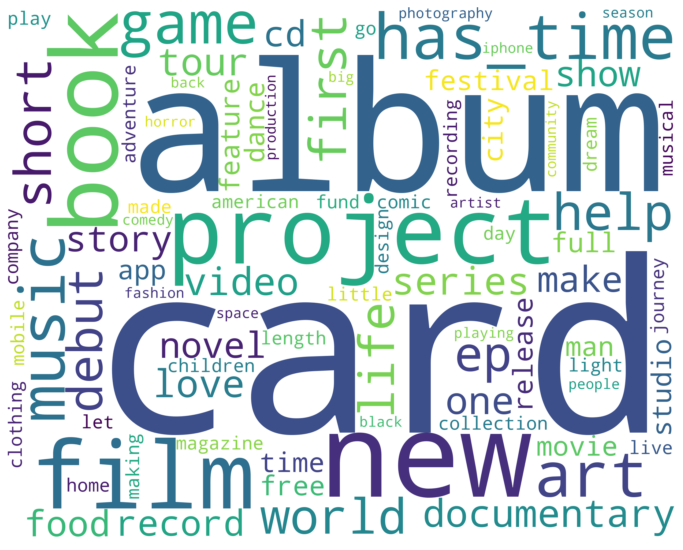

In [31]:
plotWordCloud('frequency')

### plot words that have more successful projects

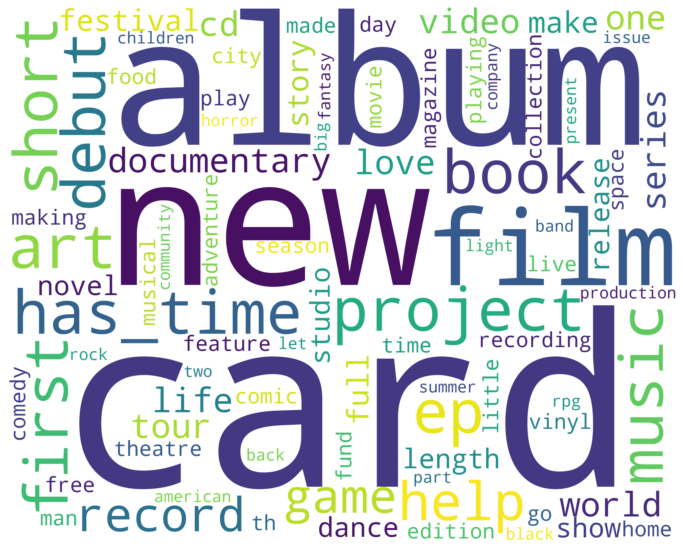

In [32]:
plotWordCloud('count_of_success')

### plot words that get highest success value

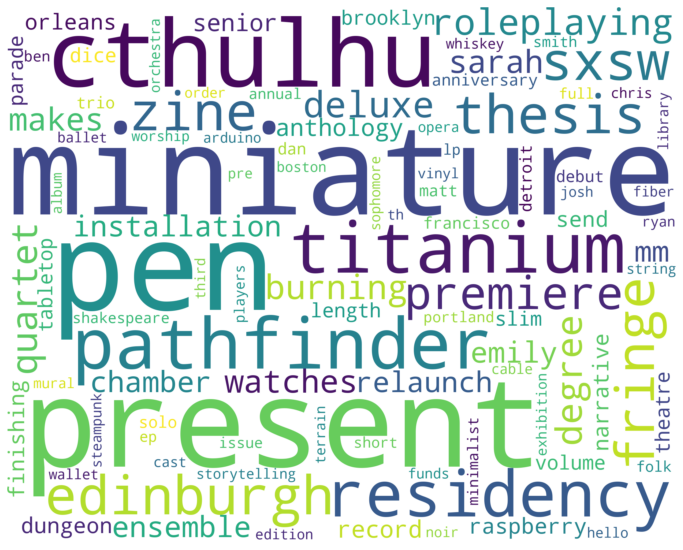

In [33]:
plotWordCloud('word_percent_success', data=wordDataset[wordDataset.frequency >= 100])

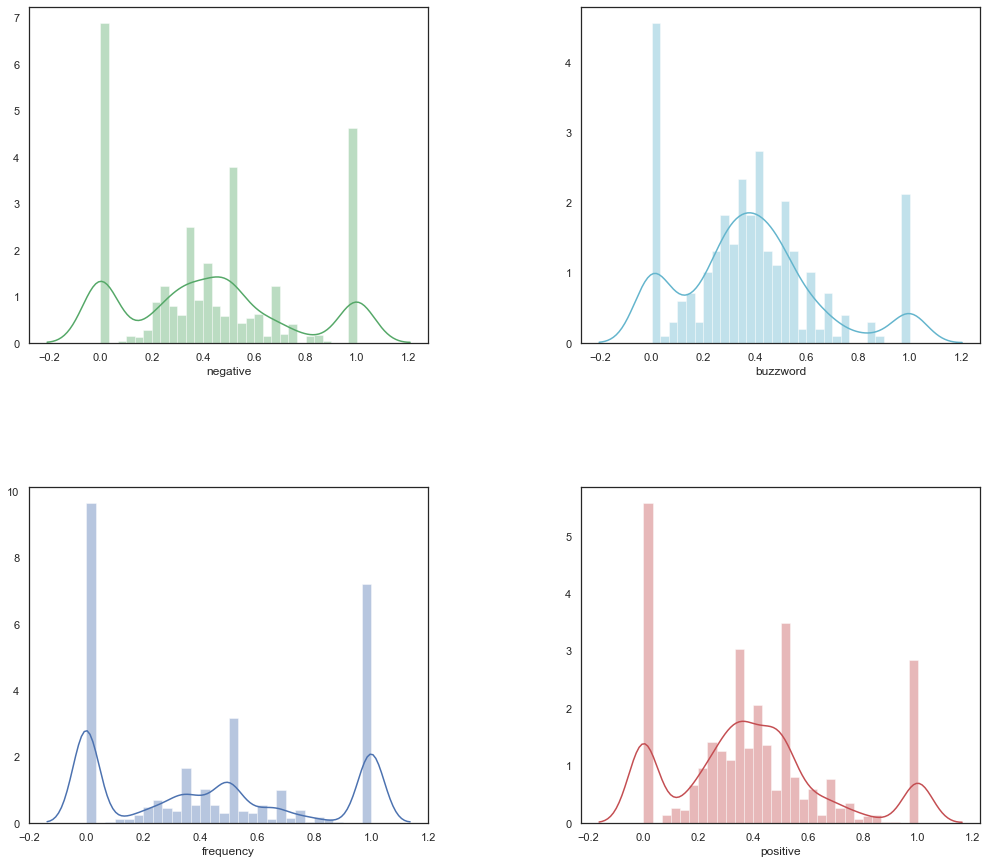

In [34]:
buzzword = wordDataset[wordDataset.buzzword == 1].word_percent_success.values
frequency = wordDataset[wordDataset.frequency_value >0].word_percent_success.values
positive = wordDataset[wordDataset.positive == 1].word_percent_success.values
negative = wordDataset[wordDataset.negative == 1].word_percent_success.values

fig , ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(17,15))

fig.tight_layout(pad=12.0)
sns.distplot(negative, bins=30, norm_hist=True, color = 'g', ax=ax1 , axlabel='negative')
sns.distplot(buzzword, bins=30, norm_hist=True, color = 'c', ax=ax2, axlabel='buzzword')
sns.distplot(frequency, bins=30, norm_hist=True, color = 'b', ax=ax3, axlabel='frequency')
sns.distplot(positive, bins=30, norm_hist=True, color = 'r', ax=ax4, axlabel='positive')

plt.show()

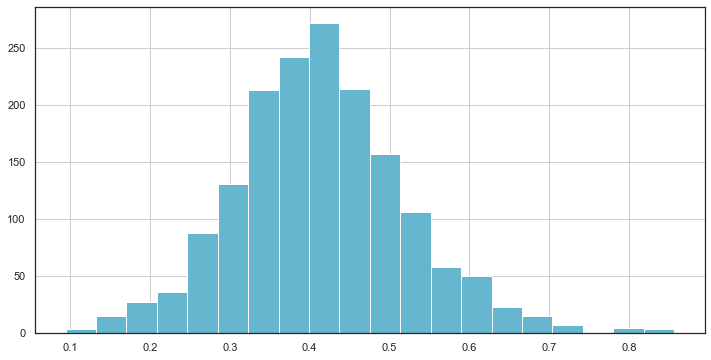

In [35]:
wordDataset[wordDataset.frequency >= 100].word_percent_success.hist(bins= 20, color = 'c', figsize=(12,6))
plt.show()

In [36]:
plotCorr(wordDataset)

,frequency,length,count_of_success,count_of_failed,word_percent_success,positive,negative,buzzword,frequency_value
frequency,1,-0.04,1,1,0.0015,0.0099,0.0018,0.015,0.15
length,-0.04,1,-0.039,-0.042,-0.027,0.021,-0.0054,-0.00064,-0.086
count_of_success,1,-0.039,1,0.98,0.0074,0.0076,0.0016,0.013,0.14
count_of_failed,1,-0.042,0.98,1,-0.0037,0.012,0.002,0.017,0.16
word_percent_success,0.0015,-0.027,0.0074,-0.0037,1,-0.0077,0.0016,-0.0048,-0.0097
positive,0.0099,0.021,0.0076,0.012,-0.0077,1,-0.017,0.078,0.046
negative,0.0018,-0.0054,0.0016,0.002,0.0016,-0.017,1,0.037,0.0046
buzzword,0.015,-0.00064,0.013,0.017,-0.0048,0.078,0.037,1,0.094
frequency_value,0.15,-0.086,0.14,0.16,-0.0097,0.046,0.0046,0.094,1


<br>
<br>
<br>
<br>

# Part 4.3 : Create Featuers

<br>
<br>
<br>
<br>

### we are going to add those columns now:
    
   
1. **name_count_words:** count of words in name

1. **clean_tokenized_name:** count of clean words in name

1. **words_len_mean:** mean of length of words

1. **name_number_count:** count of numbers in name

1. **name_time_count:** count of time in name

1. **name_url_count:** count of url in name

1. **stopword_count:** count of stopwords in name

1. **symbol_count:** count of symbols in name

1. **name_len:** count of characters in name

1. **name_repeating_words:** max count of repeating words in name

1. **name_is_question:** if name end with '?'

1. **name_is_exclamation:** if name end with '!'

1. **name_is_upper:** if all name is uppercase letters

1. **name_negative_count:** count of negative words in name

1. **name_positive_count:** count of npositive words in name

1. **name_buzzwords_count:** count of buzzwords words in name

1. **name_freq_value:** score if the words in the name frequency

1. **name_posotive_value:** score if the positive name are successful

1. **name_negative_value:** score if the negative name are successful



### count of words in name

In [37]:
df['name_count_words'] = df.tokenized_name.apply(len) 
df['clean_name_count_words'] = df.clean_tokenized_name.apply(len) 


### mean of  name words len 

In [38]:
def getWordsLenMean(arr):
    sumLen = 0 
    for value in arr:
        sumLen += len(value)
    try:
        return sumLen / len(arr)
    except:
        return 0 
            
df['words_len_mean'] =  df.tokenized_name.apply(getWordsLenMean)

### count of numbers in name

In [39]:
def numberCounter(arr):
    counter = 0 
    for x in arr:
        if isNumber(x):
            counter+=1
    return counter

df['name_number_count'] = df.clean_tokenized_name.apply(numberCounter)

### count of time in name

In [40]:
def timeCounter(arr):
    counter = 0 
    for x in arr:
        if isTime(x):
            counter+=1
    return counter

df['name_time_count'] = df.tokenized_name.apply(timeCounter)

### count of url in name

In [41]:
def urlCounter(arr):
    counter = 0 
    for x in arr:
        if isUrl(x):
            counter+=1
    return counter

df['name_url_count'] = df.tokenized_name.apply(urlCounter)


### count of stopwords in name

In [42]:
def stopWordCounter(arr):
    counter = 0
    for x in arr:
        if isStopWord(x):
            counter += 1
    return counter
        
df['stopword_count'] = df.clean_tokenized_name.apply(stopWordCounter) 


### count of symbols in name

In [43]:
def symbolCounter(arr):
    counter = 0
    for x in arr:
        if isSymbol(x):
            counter += 1
    return counter
        
df['symbol_count'] = df.clean_tokenized_name.apply(symbolCounter) 


### count of characters in name

In [44]:
df['name_len'] = df.name.str.len()

### name is question mark at the end


In [45]:
df['name_is_question'] = (df.name.str[-1] == '?').astype(int)

### name is exclamation mark at the end


In [46]:
df['name_is_exclamation'] = (df.name.str[-1] == '!').astype(int)

### max of repeating words in name


In [47]:
def maxRepeatingWordsCount(arr):
    fdist = FreqDist(arr)
    freq = pd.DataFrame(list(fdist.items()), columns = ["word","frequency"])
    return freq.frequency.max()

df['name_repeating_words'] = df.clean_tokenized_name.apply(maxRepeatingWordsCount)


### name is upper case

In [48]:
df['name_is_upper'] = df.name.str.isupper().astype(float)

### count of negative words in name

In [49]:
def negativeWordsCounter(arr):
    counter = 0
    for value in arr:        
        if isNegativeWord(value):
            counter+=1
    return counter

df['name_negative_count'] = df.clean_tokenized_name.apply(negativeWordsCounter)

### count of positive words in name

In [50]:
def positiveWordsCounter(arr):
    counter = 0
    for value in arr:        
        if isPositiveWord(value):
            counter+=1
    return counter

df['name_positive_count'] = df.clean_tokenized_name.apply(positiveWordsCounter)

### count of buzzwords in name

In [51]:
def buzzwordsCounter(name):
    counter = 0
    for value in buzzwordsData.buzzwords.values:
        if(value in nltk.WordNetLemmatizer().lemmatize(name).lower()):
            counter += 1
    return counter

df['name_buzzwords_count'] = df.name.apply(buzzwordsCounter)

### value of name frequency name
#### (sum of words freq value in name ) / (count of words in name)

In [52]:
def getNameFreqValue(values):
    sumValues = 0 
    if len(values) ==0:
        return 0
    for x in values:
        sumValues += getFreqValue(x)         
    return sumValues / len(values)



df['name_freq_value'] = df.clean_tokenized_name.apply(getNameFreqValue)

### value of success  name
#### (sum of words success percent value in name ) / (count of words in name)

In [53]:
wordSuccessValue = {}

for index, row in wordDataset[wordDataset.frequency >= 3].iterrows():
    wordSuccessValue[row.word] =  row.word_percent_success


def getSuccessValueByName(values):
    sumValues = 0 
    lenValues= 0
    for x in values:
        if (isTime(x) == False) &  (isUrl(x) == False) &  (isNumber(x) == False) :
            try:
                sumValues += wordSuccessValue[x]
                lenValues+= 1
            except:
                sumValues +=0
    try:
        return sumValues / lenValues
    except:
        return 0
    
df['name_success_value'] = df.clean_tokenized_name.apply(lambda x : getSuccessValueByName(x))


In [54]:
df

,ID,name,category,main_category,deadline,launched,state,backers,country,pledged,goal,state_value,hour,day,month,year,weekday,duration,backers_median_category,backers_mean_category,success_percent_category,pledged_median_category,goal_median_category,tokenized_name,clean_tokenized_name,name_count_words,clean_name_count_words,words_len_mean,name_number_count,name_time_count,name_url_count,stopword_count,symbol_count,name_len,name_is_question,name_is_exclamation,name_repeating_words,name_is_upper,name_negative_count,name_positive_count,name_buzzwords_count,name_freq_value,name_success_value
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09 00:00:00,2015-08-11 12:12:28,failed,0,GB,0.000000,1533.950000,0,12,11,8,2015,1,59,0.036496,0.028319,0.405193,0.013337,0.045598,"[The, Songs, of, Adelaide, &, Abullah]","[the, songs, of, adelaide, &, abullah]",6,6,4.333333,0,0,0,2,1,31,0,0,1,0.000000,0,0,0,0.261817,0.395431
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01 00:00:00,2017-09-02 04:43:57,failed,15,US,2421.000000,30000.000000,0,4,2,9,2017,5,60,0.167883,0.176530,0.455267,0.133340,0.318284,"[Greeting, From, Earth, :, ZGAC, Arts, Capsule...","[greeting, from, earth, :, zgac, arts, capsule...",9,9,4.222222,0,0,0,2,1,45,0,0,1,0.000000,0,0,0,0.040789,0.377525
2,1000004038,Where is Hank?,Narrative Film,Film & Video,2013-02-26 00:00:00,2013-01-12 00:20:50,failed,3,US,220.000000,45000.000000,0,0,12,1,2013,5,45,0.167883,0.176530,0.455267,0.133340,0.318284,"[Where, is, Hank, ?]","[where, is, hank, ?]",4,4,3.000000,1,0,0,2,1,14,1,0,1,0.000000,0,0,0,0.054780,0.428571
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16 00:00:00,2012-03-17 03:24:11,failed,1,US,1.000000,5000.000000,0,3,17,3,2012,5,30,0.138686,0.096836,0.573300,0.065204,0.147856,"[ToshiCapital, Rekordz, Needs, Help, to, Compl...","[toshicapital, rekordz, needs, help, to, compl...",7,7,6.142857,0,0,0,1,0,49,0,0,1,0.000000,0,0,1,0.080881,0.495710
4,1000014025,Monarch Espresso Bar,Restaurants,Food,2016-04-01 00:00:00,2016-02-26 13:38:27,successful,224,US,52375.000000,50000.000000,1,13,26,2,2016,4,35,0.007299,0.048399,0.116545,0.004295,0.829571,"[Monarch, Espresso, Bar]","[monarch, espresso, bar]",3,3,6.000000,0,0,0,0,0,20,0,0,1,0.000000,0,0,0,0.001205,0.420636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331667,999975836,"Homemade fresh dog food, Cleveland OH",Small Batch,Food,2017-04-19 00:00:00,2017-03-20 22:08:22,failed,4,US,154.000000,6500.000000,0,22,20,3,2017,0,30,0.036496,0.070160,0.303577,0.014758,0.147856,"[Homemade, fresh, dog, food, ,, Cleveland, OH]","[homemade, fresh, dog, food, ,, cleveland, oh]",7,7,4.571429,0,0,0,0,1,37,0,0,1,0.000000,0,1,0,0.002475,0.376887
331668,999977640,The Tribe,Narrative Film,Film & Video,2011-07-19 00:00:00,2011-06-22 03:35:14,failed,5,US,155.000000,1500.000000,0,3,22,6,2011,2,27,0.167883,0.176530,0.455267,0.133340,0.318284,"[The, Tribe]","[the, tribe]",2,2,4.000000,0,0,0,1,0,9,0,0,1,0.000000,0,0,0,0.500170,0.464789
331669,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,2010-08-16 00:00:00,2010-07-01 19:40:30,failed,1,US,20.000000,15000.000000,0,19,1,7,2010,3,46,0.167883,0.176530,0.455267,0.133340,0.318284,"[Walls, of, Remedy-, New, lesbian, Romantic, C...","[walls, of, remedy, -, new, lesbian, romantic,...",13,14,4.692308,0,0,0,3,3,71,0,1,2,0.000000,0,2,0,0.051241,0.463616
331670,999987933,BioDefense Education Kit,Technology,Technology,2016-02-13 00:00:00,2016-01-13 18:13:53,failed,6,US,200.000000,15000.000000,0,18,13,1,2016,2,31,0.065693,0.306565,0.201147,0.036168,0.659142,"[BioDefense, Education, Kit]","[biodefense, education, kit]",3,3,7.333333,0,0,0,0,0,24,0,0,1,0.000000,0,0,3,0.004709,0.338708


In [55]:
writeCSV(df,'fullData.csv')
trainData = splitData(df,'TrainData.csv','TestData.csv')
trainData.shape 

(238961, 43)

<br>
<br>
<br>
<br>

# Part 4.4 : Data Visualization

<br>
<br>
<br>
<br>

<br>
<br>
<br>

## describe full train data

<br>
<br>
<br>

In [56]:
trainData.describe()

,ID,backers,pledged,goal,state_value,hour,day,month,year,weekday,duration,backers_median_category,backers_mean_category,success_percent_category,pledged_median_category,goal_median_category,name_count_words,clean_name_count_words,words_len_mean,name_number_count,name_time_count,name_url_count,stopword_count,symbol_count,name_len,name_is_question,name_is_exclamation,name_repeating_words,name_is_upper,name_negative_count,name_positive_count,name_buzzwords_count,name_freq_value,name_success_value
count,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000,238961.000000
mean,1074390179.039442,106.420621,8686.566196,39607.111537,0.404786,13.011985,15.304029,6.542047,2013.292219,2.434891,34.474814,0.142799,0.159058,0.431244,0.076864,0.207665,6.409607,6.794280,5.018167,0.231963,0.026540,0.003879,1.329811,1.119752,34.167793,0.004942,0.085303,1.184323,0.039894,0.152874,0.203000,0.262332,0.080757,0.419750
std,619475910.085835,955.783203,89553.530567,1089799.099850,0.490852,7.894270,8.776843,3.303666,1.502865,1.747674,13.147914,0.148555,0.190896,0.192600,0.079385,0.162388,3.338631,3.592525,1.645670,0.615536,0.163035,0.063561,1.348527,1.277272,15.976884,0.070127,0.279332,0.514102,0.195709,0.404808,0.465991,0.556395,0.098464,0.106205
min,5971.000000,0.000000,0.000000,0.010000,0.000000,0.000000,1.000000,1.000000,2009.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,535998693.000000,2.000000,50.000000,2000.000000,0.000000,5.000000,8.000000,4.000000,2012.000000,1.000000,30.000000,0.051095,0.061031,0.294930,0.025060,0.096727,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.003471,0.380251
50%,1075156247.000000,15.000000,813.000000,5000.000000,0.000000,16.000000,15.000000,7.000000,2014.000000,2.000000,30.000000,0.102190,0.081498,0.416229,0.047633,0.147856,6.000000,6.000000,4.700000,0.000000,0.000000,0.000000,1.000000,1.000000,33.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.043453,0.428205
75%,1610960921.000000,61.000000,4429.990000,15000.000000,1.000000,20.000000,23.000000,9.000000,2015.000000,4.000000,38.000000,0.167883,0.145302,0.573300,0.113209,0.267156,9.000000,9.000000,5.666667,0.000000,0.000000,0.000000,2.000000,2.000000,48.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.129379,0.476389
max,2147476221.000000,219382.000000,20338986.270000,166361390.710000,1.000000,23.000000,31.000000,12.000000,2015.000000,6.000000,92.000000,1.000000,1.000000,1.000000,1.000000,1.000000,57.000000,57.000000,45.000000,32.000000,2.000000,2.000000,14.000000,54.000000,85.000000,1.000000,1.000000,54.000000,1.000000,5.000000,5.000000,7.000000,0.666718,1.000000


<br>
<br>
<br>

## visualtion full train data

<br>
<br>
<br>

In [57]:
def plotColumnStateCompare(data,column, hue = 'state'):
    fig, ax = plt.subplots(1,1, figsize=(12,10))
    plt.subplot(212)
    ax = sns.countplot(x=column, hue=hue, data=data , palette='GnBu' )
    ax.set_title("Projects count by " + str(column), fontsize=22)
    ax.set_xlabel(str(column), fontsize=17)
    ax.set_ylabel("Count", fontsize=17),
    ax.legend(loc='upper right')
    plt.subplots_adjust(hspace = 0.4)
    plt.show()


<br>

## Plotting count words len mean -  successful compare failed

<br>

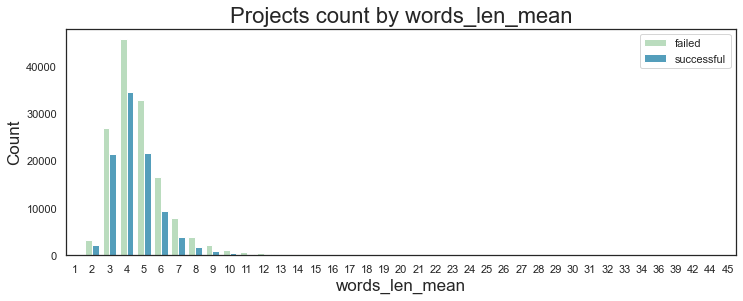

In [58]:
data = trainData.copy()
data.words_len_mean = data.words_len_mean.astype('int64')
plotColumnStateCompare(data, 'words_len_mean')

<br>

## Plotting count words in name -  successful compare failed

<br>

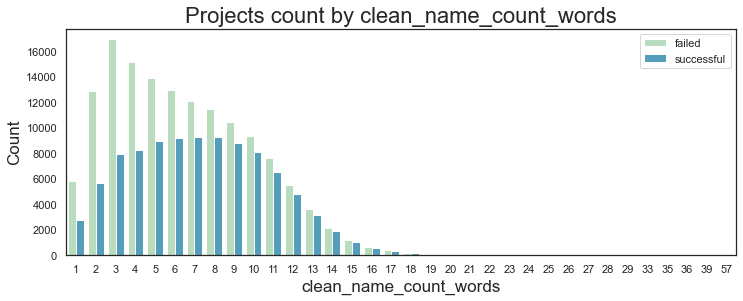

In [59]:
plotColumnStateCompare(trainData, 'clean_name_count_words')

<br>

## Plotting pairplot

<br>

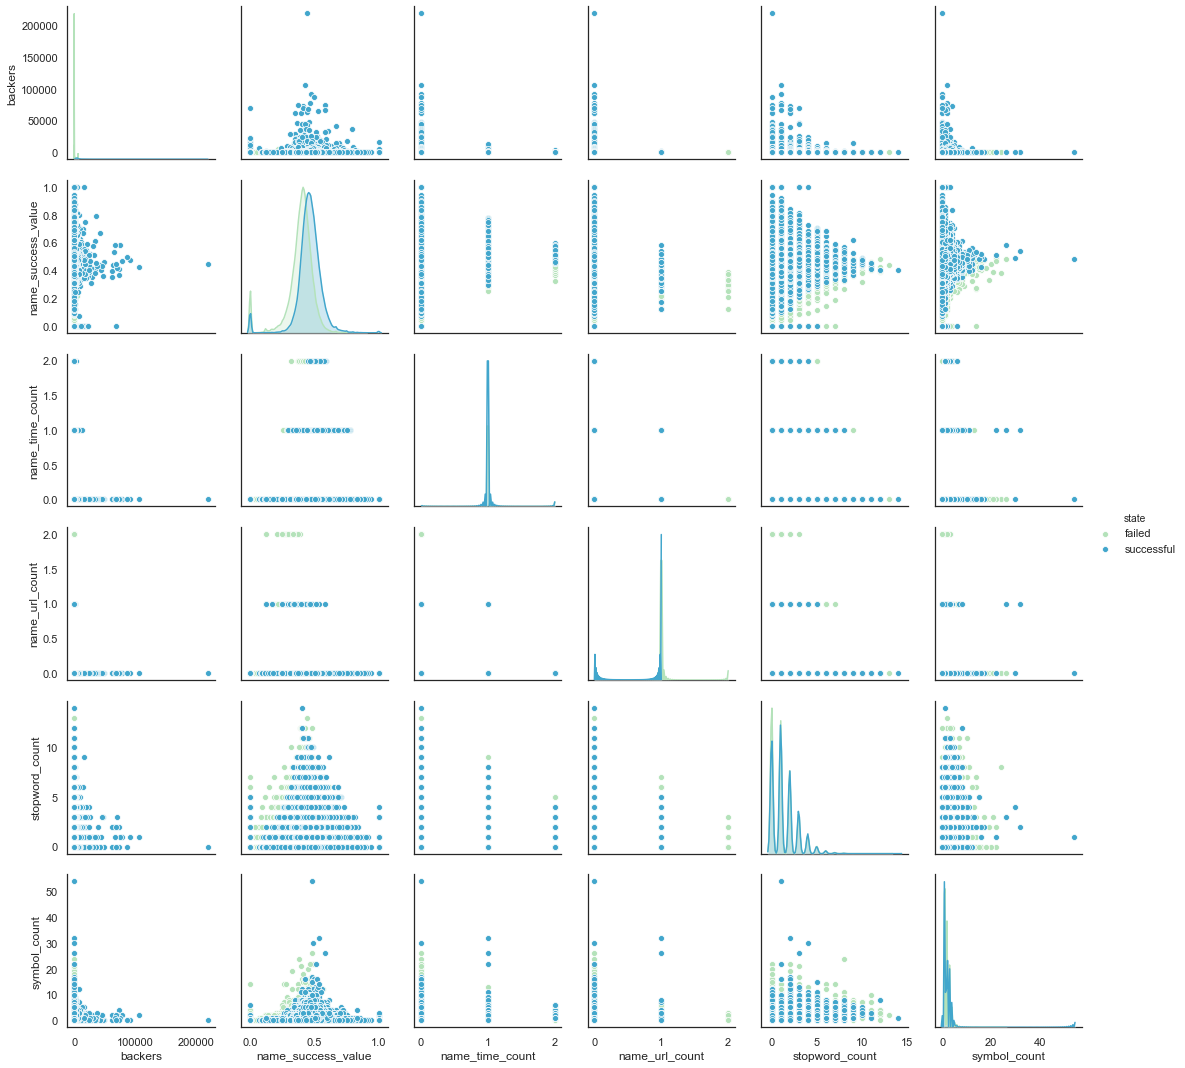

In [60]:
data = trainData[['state','backers','name_success_value','name_time_count','name_url_count','stopword_count',
                  'symbol_count']].copy()
sns.pairplot(data, hue='state', palette = 'GnBu')
plt.show()

<br>

## Plotting histogram name_success_value compare succssful and failed

<br>

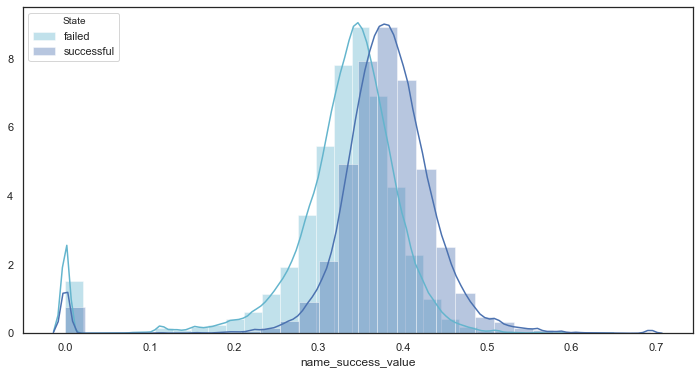

In [61]:
failed = np.log1p(trainData[trainData.state == 'failed'].name_success_value)
success = np.log1p(trainData[trainData.state == 'successful'].name_success_value)
plt.figure(figsize=(12,6))
sns.distplot(failed, bins=30, norm_hist=True, color = 'c')
sns.distplot(success, bins=30, norm_hist=True)
plt.legend(title='State', loc='upper left', labels=['failed', 'successful'])
plt.show()

<br>

## Plotting impact of words len mean on name success value

<br>

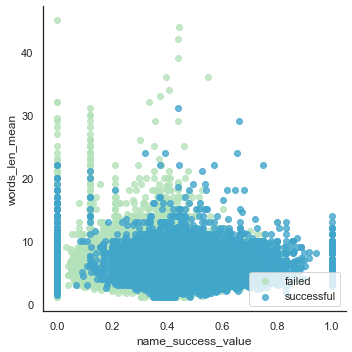

In [62]:
sns.lmplot( x="name_success_value", y="words_len_mean", data=trainData, fit_reg=False, hue='state',
           legend=False,palette='GnBu')
plt.legend(loc='lower right')
plt.show()

<br>

## Plotting impact of words len mean on backers

<br>

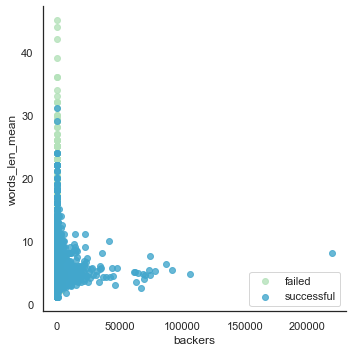

In [63]:
sns.lmplot( x="backers", y="words_len_mean", data=trainData, fit_reg=False, hue='state',
           legend=False,palette='GnBu')
plt.legend(loc='lower right')
plt.show()

<br>

## Plotting impact of question mark on backers , name_success_value and state

<br>

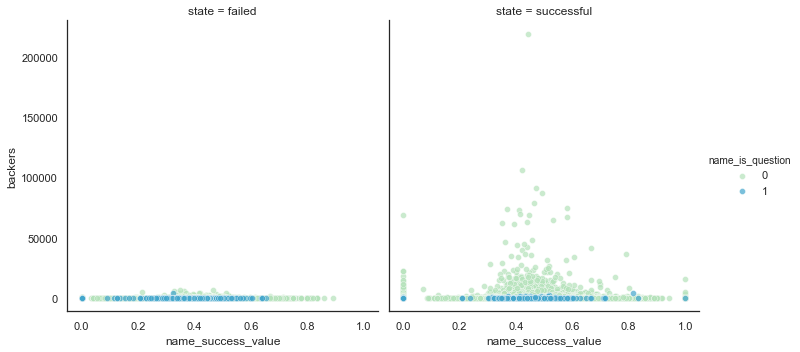

In [64]:
g = sns.FacetGrid(trainData, col="state", hue="name_is_question", palette='GnBu', height=5)
g.map(plt.scatter, "name_success_value", "backers", alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend()
plt.show()

<br>

## Plotting impact of exclamation mark on backers , name_success_value and state

<br>

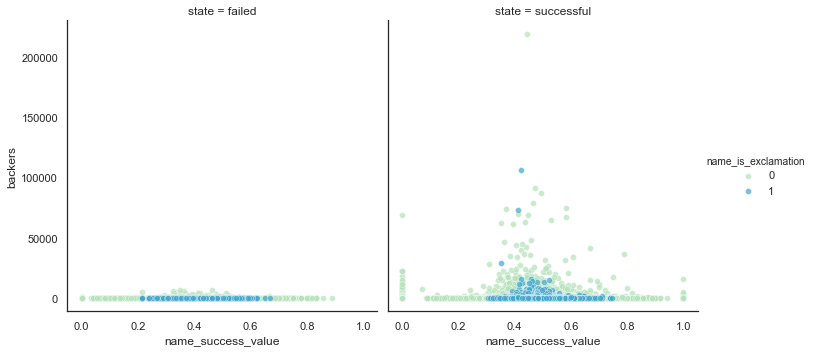

In [65]:
g = sns.FacetGrid(trainData, col="state", hue="name_is_exclamation", palette='GnBu', height=5)
g.map(plt.scatter, "name_success_value", "backers", alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend()
plt.show()

<br>

## Plotting impact of upper name mark on backers , name_success_value and state

<br>

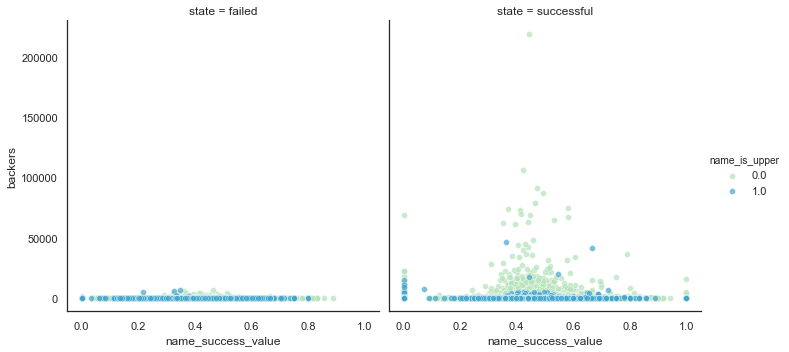

In [66]:
g = sns.FacetGrid(trainData, col="state", hue="name_is_upper", palette='GnBu', height=5)
g.map(plt.scatter, "name_success_value", "backers", alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend()
plt.show()

<br>

## Plotting impact of name_success_value on backers  and state

<br>

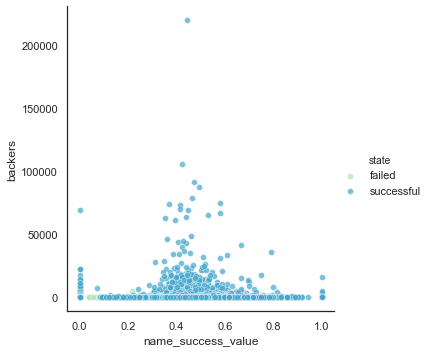

In [67]:
g = sns.FacetGrid(trainData ,hue="state", palette='GnBu', height=5)
g.map(plt.scatter, "name_success_value", "backers", alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend()
plt.show()

<br>

## Plot correlation

<br>

In [68]:
plotCorr(trainData)

,ID,backers,pledged,goal,state_value,hour,day,month,year,weekday,duration,backers_median_category,backers_mean_category,success_percent_category,pledged_median_category,goal_median_category,name_count_words,clean_name_count_words,words_len_mean,name_number_count,name_time_count,name_url_count,stopword_count,symbol_count,name_len,name_is_question,name_is_exclamation,name_repeating_words,name_is_upper,name_negative_count,name_positive_count,name_buzzwords_count,name_freq_value,name_success_value
ID,1,0.00036,0.00039,0.0026,-0.0016,0.0024,0.0035,0.0012,-0.0014,-0.0017,0.0031,-0.0035,-0.00045,-0.0047,-0.0033,0.00051,-0.0031,-0.0032,-0.00057,-0.0022,0.0015,-0.00038,-0.0017,-0.0025,-0.0039,-0.00039,-0.002,-0.00029,-0.0009,0.0001,0.0012,-0.0022,1.1e-05,-0.0017
backers,0.00036,1,0.77,0.0073,0.11,0.0084,-0.0022,-0.0039,0.013,-0.021,-0.0018,0.074,0.12,0.0044,0.07,0.057,0.014,0.014,-0.0039,0.012,-0.0055,-0.0053,0.00079,0.014,0.016,-0.0033,0.00048,0.0049,-0.0024,0.00053,0.0099,0.0018,-0.0017,0.031
pledged,0.00039,0.77,1,0.0083,0.099,0.0066,-0.0025,-0.0014,0.018,-0.02,0.006,0.066,0.1,0.0043,0.079,0.073,0.019,0.021,-0.0043,0.015,-0.0062,-0.0045,0.0048,0.017,0.024,-0.0033,-0.0029,0.0072,-0.0033,-0.0045,0.014,0.0029,-0.0012,0.027
goal,0.0026,0.0073,0.0083,1,-0.023,0.0026,-0.002,0.0023,0.019,-0.0036,0.016,-0.0077,0.0077,-0.015,-0.0057,0.024,-0.0057,-0.0054,0.0041,0.0027,-0.00089,6.7e-05,-0.0047,-0.0014,-0.0047,0.0076,-0.001,0.0083,0.0028,-0.0014,-0.0019,0.00013,0.00025,-0.011
state_value,-0.0016,0.11,0.099,-0.023,1,0.0044,-0.014,-0.024,-0.13,-0.0089,-0.11,0.19,0.011,0.3,0.18,-0.11,0.11,0.11,-0.081,0.0086,0.047,-0.035,0.042,0.088,0.093,-0.011,0.055,0.017,-0.013,0.019,-0.017,0.011,0.0078,0.32
hour,0.0024,0.0084,0.0066,0.0026,0.0044,1,0.00078,0.011,0.064,-0.13,-0.022,-0.0026,0.0038,-0.017,-0.0039,0.013,-0.0083,-0.008,0.0086,-0.002,-0.0018,3.2e-05,-0.0072,-0.0092,-0.0042,-0.00073,-0.005,-0.0054,-0.00031,-0.0055,0.0045,0.00057,-0.0068,-0.0088
day,0.0035,-0.0022,-0.0025,-0.002,-0.014,0.00078,1,-0.037,-0.0034,0.005,-0.0029,-0.0094,-0.0015,-0.012,-0.0056,0.0079,-0.0023,-0.0029,0.00088,6.6e-05,-0.0029,-0.00086,-0.0014,-0.0031,-0.0028,0.00078,-0.0016,0.00094,0.0036,0.0015,0.0012,0.00044,-0.00084,-0.0093
month,0.0012,-0.0039,-0.0014,0.0023,-0.024,0.011,-0.037,1,-0.078,-0.025,-0.016,0.0015,0.026,-0.038,0.0029,0.034,0.005,0.0064,0.0075,0.0046,-0.0086,0.0043,-0.00036,0.007,0.01,0.0023,-0.01,0.0071,-0.0062,-0.0025,0.011,0.003,-0.0041,-0.018
year,-0.0014,0.013,0.018,0.019,-0.13,0.064,-0.0034,-0.078,1,-0.045,-0.21,-0.04,0.094,-0.26,-0.051,0.18,-0.13,-0.12,0.092,-0.0098,-0.024,0.028,-0.11,-0.1,-0.097,-0.0035,-0.066,-0.04,-0.012,-0.033,0.019,-0.019,-0.065,-0.16
weekday,-0.0017,-0.021,-0.02,-0.0036,-0.0089,-0.13,0.005,-0.025,-0.045,1,0.021,-0.0016,-0.023,0.024,-0.0068,-0.031,0.002,0.00084,-0.0064,-0.0075,0.003,-0.0008,0.0031,0.00089,-0.0017,0.0015,0.0045,0.0012,0.0055,0.0019,-0.0057,-0.0028,0.0067,0.011


<br>
<br>
<br>
<br>


# conclusion :


## * Choose a name with at least 6-7 words . (but not too much more then that).

## * try to use in a short words. not too long word. 

## * prefer using in frequency words

## * symbol and stopwords are good, but not too much

##  * name that end with exclamation get more backers then name that end with question and name is upper

<br>
<br>
<br>
<br>
